In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [9]:
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#Used to print random values
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2211,59928,Female,41.0,0,0,Yes,Self-employed,Rural,89.14,37.4,formerly smoked,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3554,1323,Female,45.0,0,0,Yes,Private,Rural,87.47,21.5,never smoked,0
263,67855,Female,40.0,0,0,Yes,Private,Rural,95.04,42.4,never smoked,0
426,50305,Female,56.0,1,0,Yes,Private,Rural,205.26,40.3,never smoked,0
1227,7516,Male,53.0,0,0,Yes,Self-employed,Urban,94.89,28.5,never smoked,0
4892,24299,Male,54.0,1,0,Yes,Self-employed,Rural,97.99,32.3,smokes,0
3824,19675,Female,51.0,0,0,Yes,Self-employed,Rural,103.61,39.2,never smoked,0
1891,12376,Male,63.0,0,0,Yes,Govt_job,Urban,95.16,37.8,formerly smoked,0
401,49465,Female,13.0,0,0,No,children,Urban,70.16,21.2,never smoked,0


In [13]:
df.describe() #Gives the overall description of dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
df.info() #object = string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
#Displaying the rows that have age greater than 50
df[df['age'] > 50]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [17]:
#Displaying the rowa that have heart disease
df[df['heart_disease'] == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,42563,Female,57.0,1,1,Yes,Private,Rural,231.72,45.7,formerly smoked,0
4869,72715,Female,50.0,0,1,Yes,Private,Urban,193.80,26.4,never smoked,0
4921,4062,Male,72.0,0,1,Yes,Private,Rural,238.27,NaN,smokes,0
4986,53697,Male,58.0,0,1,Yes,Private,Rural,225.35,26.5,smokes,0


In [18]:
#Displaying the rows that do not have hypertension
df[df['hypertension'] == 0]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
#Displaying the rows that have heart disease and age greater than 40
df[((df['age'] > 40)&(df['heart_disease'] == 1))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,42563,Female,57.0,1,1,Yes,Private,Rural,231.72,45.7,formerly smoked,0
4869,72715,Female,50.0,0,1,Yes,Private,Urban,193.80,26.4,never smoked,0
4921,4062,Male,72.0,0,1,Yes,Private,Rural,238.27,NaN,smokes,0
4986,53697,Male,58.0,0,1,Yes,Private,Rural,225.35,26.5,smokes,0


In [21]:
#Displaing the rows that have hypertension and no heart disease
df[((df['hypertension'] == 1)&(df['heart_disease'] == 0))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5088,22190,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0
5091,6369,Male,59.0,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


### Find Missing values from the dataset

In [23]:
null = df.isna().sum()
print(null)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df['gender']
df['age']
work_type              
Residence_type
ever_married

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


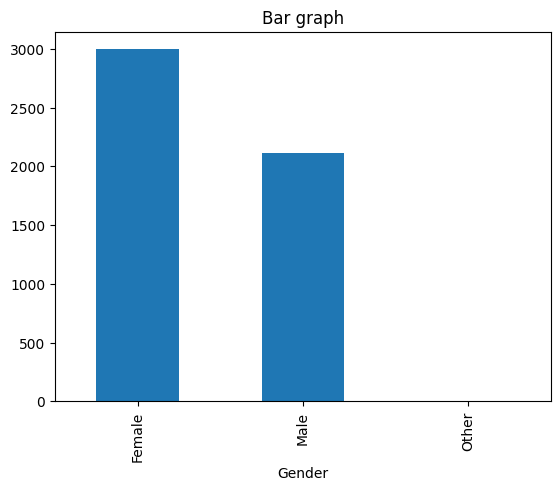

In [60]:
trans = df['gender'].value_counts()
print(trans)
trans.plot.bar()
plt.title('Bar graph')
plt.xlabel("Gender")
plt.show()

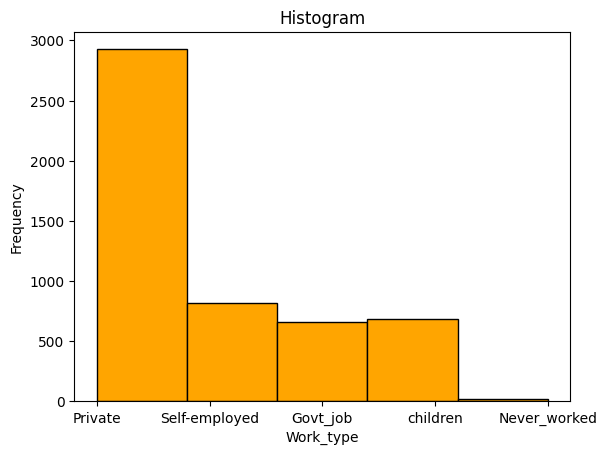

In [35]:
plt.hist(df['work_type'],bins = 5,color = 'orange',edgecolor = 'black')
plt.title('Histogram')
plt.xlabel('Work_type')
plt.ylabel('Frequency')
plt.show()

In [81]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

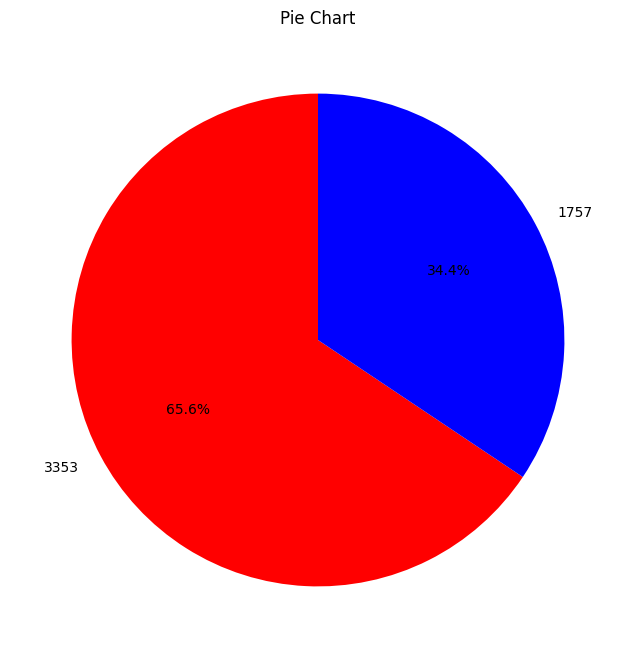

In [82]:
categories_pie = df['ever_married'].value_counts()
values_pie = df['ever_married'].value_counts()

plt.figure(figsize = (8,8))
plt.pie(values_pie,labels = categories_pie,autopct = '%1.1f%%',startangle = 90,colors = ['red','blue'])
plt.title('Pie Chart')
plt.show()

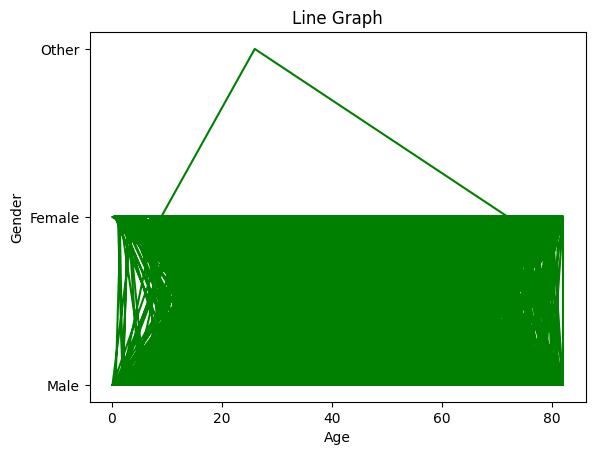

In [24]:
x=df.age
y=df.gender
plt.plot(x,y,color = 'green')
plt.title('Line Graph')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

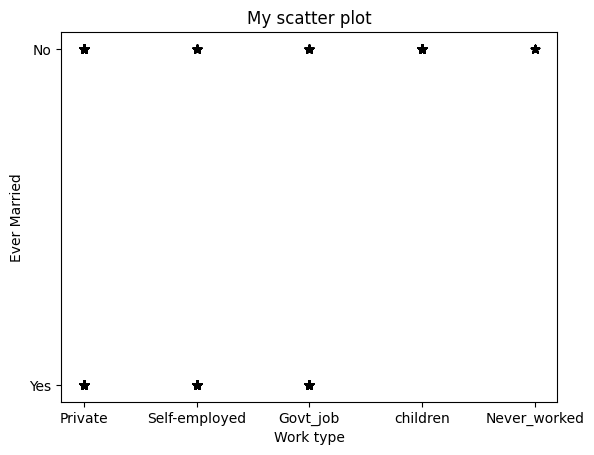

In [38]:
x = df['work_type']
y = df['ever_married']
plt.scatter(x,y,color = 'black',marker = '*')
plt.xlabel('Work type')
plt.ylabel('Ever Married')
plt.title('My scatter plot')
plt.show()

In [26]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [27]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [28]:
df['ever_married'].count()

5110

In [29]:
df['work_type'].count()

5110

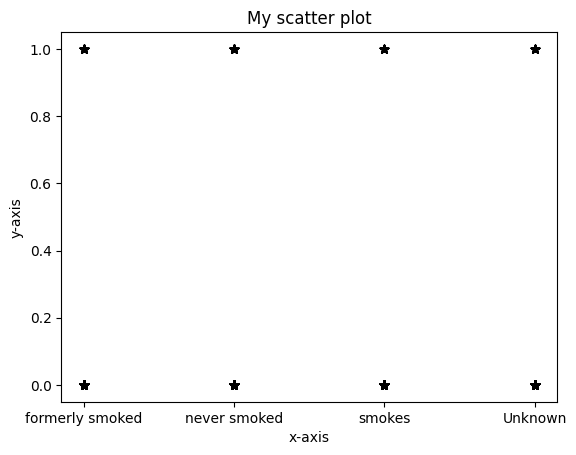

In [49]:
x = df['smoking_status']
y = df['stroke']

plt.scatter(x,y,color = 'black',marker = '*')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('My scatter plot')
plt.show()